In [0]:
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0,)
y_data=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0)
y_data=y_data[y_data>0]#no erroors

In [0]:
result = x_data.join(y_data, how='outer').dropna()

In [0]:
x_data=result.iloc[:,9:18]

In [0]:
y_data=result["value"]/3.6 #Km/h to m/s

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)

In [9]:
l0 = tf.keras.layers.Dense(units=6, input_shape=[9]) 
l1 = tf.keras.layers.Dense(units=1,)
model = tf.keras.Sequential([l0,l1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(0.1),metrics=["mae"])

In [0]:
history = model.fit(x_train, y_train, validation_split=0.2,epochs=200, verbose=False)
print("Finished training the model")

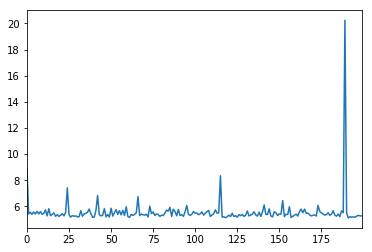

In [12]:
hist=pd.DataFrame(history.history)
hist["loss"].plot()

In [0]:
hist["val_loss"].plot()

In [0]:
hist["mean_absolute_error"].plot()

In [0]:
y_pred=model.predict(x_test)

In [0]:
y_pred=y_pred.reshape(1,-1)[0]

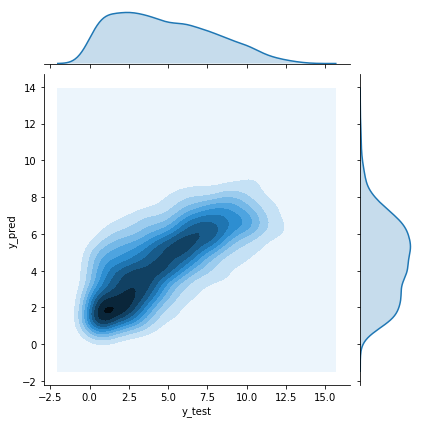

In [17]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2)

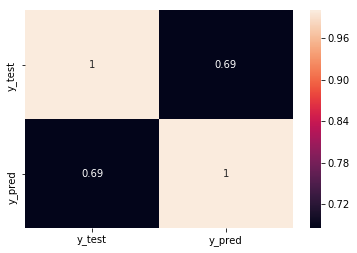

In [18]:
sns.heatmap(df2.corr(),annot=True)

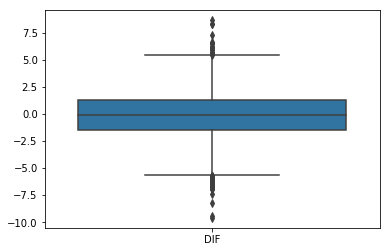

In [19]:
df2['DIF']=y_pred-y_test
ax = sns.boxplot(data=df2.iloc[:,2:3])

In [20]:
df2.iloc[:,2:3].describe()

,DIF
count,2550.000000
mean,-0.191407
std,2.250930
min,-9.604206
25%,-1.533803
50%,-0.150112
75%,1.239453
max,8.640972
